# **LAB Practice Programming Assignment-8**

# **Sequence Processing with RNN**

Submitted by:

Anusha Singh

BTech DSAI 4

220641

1. Solve a numeric sequence processing problem using Vanilla RNN.

i. Generate data synthetically and split it into training and tes set. Train the RNN model with the training data. Evaluate the model on the test data. Summarize model architecture and training metrics (progress of loss/error for different epochs).

In [1]:
import numpy as np

# Create sequences like [1, 2, 3] -> 4, [2, 3, 4] -> 5
X = []
y = []
for i in range(1, 1000):
    X.append([i, i+1, i+2])
    y.append(i+3)

X = np.array(X)
y = np.array(y)

# Normalize data
X = X / 1000
y = y / 1000

# Reshape to [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0281 - mae: 0.1245 - val_loss: 0.0012 - val_mae: 0.0319
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - mae: 0.0341 - val_loss: 4.5068e-04 - val_mae: 0.0186
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1330e-04 - mae: 0.0143 - val_loss: 1.9102e-04 - val_mae: 0.0109
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0667e-04 - mae: 0.0122 - val_loss: 1.6737e-04 - val_mae: 0.0105
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7479e-04 - mae: 0.0108 - val_loss: 1.4498e-04 - val_mae: 0.0101
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5726e-04 - mae: 0.0107 - val_loss: 1.2866e-04 - val_mae: 0.0096
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3925e-04 - mae: 0.0099 - val_loss: 1.1910e-04 - val_mae: 0.0096
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1963e-04 - mae: 0.0093 - val_loss: 1.1077e-04 - val_mae: 0.0093
Epoch 9/50
25/25 ━━

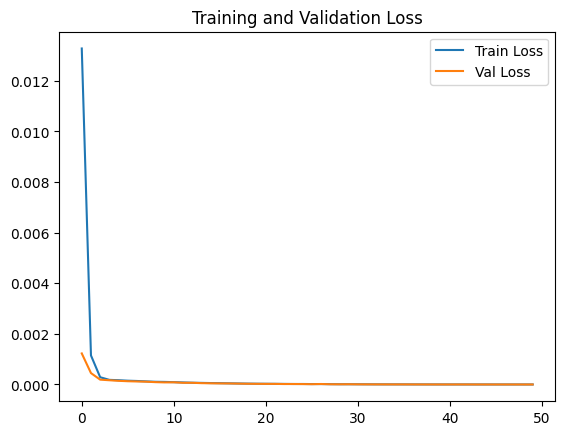

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


RNN model learned the sequence prediction task very efficiently.Training and validation losses are both very low and well-aligned.No signs of underfitting or overfitting.

2. Build and train a Recurrent Neural Network (RNN) using Keras to predict the next character in a given sequence of text. This task helps in understanding how RNNs can learn temporal patterns from sequential data.

Use a small text dataset (you may use a sample from nltk.corpus.gutenberg or any .txt file).

In [6]:
from nltk.corpus import gutenberg
import nltk
nltk.download('gutenberg')

text = gutenberg.raw('austen-emma.txt')[:10000]  # Take a small sample
chars = sorted(list(set(text)))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [7]:
seq_length = 40
X = []
y = []

for i in range(len(text) - seq_length):
    seq = text[i:i+seq_length]
    next_char = text[i+seq_length]
    X.append([char_to_idx[c] for c in seq])
    y.append(char_to_idx[next_char])

# One-hot encode
from tensorflow.keras.utils import to_categorical

X = to_categorical(X, num_classes=len(chars))
y = to_categorical(y, num_classes=len(chars))

X = np.array(X)
y = np.array(y)


In [8]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(128, input_shape=(seq_length, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,960 (128.75 KB)

 Trainable params: 32,960 (128.75 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(X, y, epochs=10, batch_size=128)

# Predict next character
import random

seed = text[0:seq_length]
for _ in range(100):
    x_pred = to_categorical([[char_to_idx[c] for c in seed]], num_classes=len(chars))
    pred = model.predict(x_pred, verbose=0)
    next_index = np.argmax(pred)
    next_char = idx_to_char[next_index]
    seed += next_char
    seed = seed[1:]
    print(next_char, end='')


Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 3.4801
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.9568
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.7827
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 2.6058
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 2.5026
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 2.4195
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.3100
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 2.2199
Epoch 9/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.1838
Epoch 10/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.1310
umhed ho  hous was and her har and her and her har and her and her har and her and her har and her a

3. Download Amazon product review dataset for sentiment classification.
Build and train a LSTM model to classify the review as positive/negative.

In [2]:
import pandas as pd


In [3]:
# Load the CSV file
df = pd.read_csv("/content/Reviews.csv")

# Check the structure
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# Filter only positive and negative reviews
df = df[df['Score'] != 3]
df['label'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

# Select only needed columns
df = df[['Text', 'label']]
df = df.dropna()

# Optional: check balance
df['label'].value_counts()

<ipython-input-4-e2eac0a81f79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)


,count
label,
1,23022
0,4431


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Tokenize text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Text'])

sequences = tokenizer.texts_to_sequences(df['Text'])
padded = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

# Split
X_train, X_test, y_train, y_test = train_test_split(padded, df['label'].values, test_size=0.2, random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=200),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8152 - loss: 0.4790 - val_accuracy: 0.8374 - val_loss: 0.4483
Epoch 2/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8413 - loss: 0.4380 - val_accuracy: 0.8374 - val_loss: 0.4433
Epoch 3/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8394 - loss: 0.4390 - val_accuracy: 0.8379 - val_loss: 0.4424
Epoch 4/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8402 - loss: 0.4365 - val_accuracy: 0.8370 - val_loss: 0.4444
Epoch 5/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8484 - loss: 0.4196 - val_accuracy: 0.8297 - val_loss: 0.4645


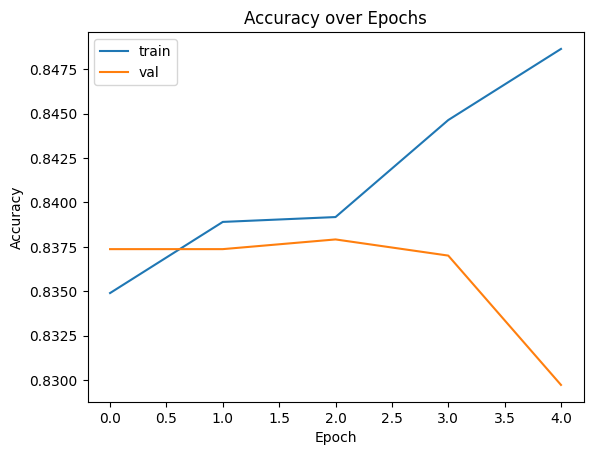

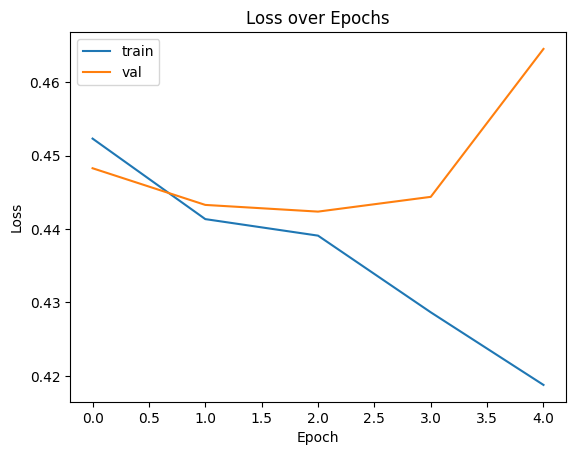

In [7]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8270 - loss: 0.4658
Test Accuracy: 82.97%


In [9]:
def predict_review(text):
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=200, padding='post', truncating='post')
    pred = model.predict(padded_seq)[0][0]
    return "Positive" if pred > 0.5 else "Negative"

# Try it!
predict_review("This product is fantastic! Highly recommend it.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


'Positive'